## <p style="text-align: right;"> &#9989;Haoyan Lin</p>

# Day 21 Pre-Class assignment: Back propagation
This pre-class assignment finishes out the videos from "Neural Networks Demystified" module.  Please watch the videos.  Again, you do not have to understand the equations but the math is included for completeness.

If you are lost, I highly recommend reviewing the entire "Neural Networks Demystified" module which can be downloaded from github:

    git clone https://github.com/stephencwelch/Neural-Networks-Demystified


<img src="https://www.pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg" width=400px>

### Goals for this pre-class assignment:

1. Reviewing gradient descent
1. Performing Back Propagation
1. Training at network

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" dropbox folder in the Desire2Learn website.

---

## Gradient Decent

&#9989; Do This -  watch the following video:

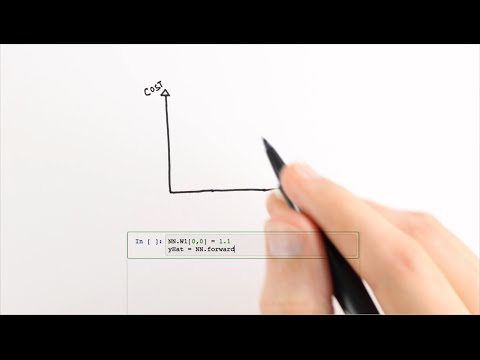

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5u0jaA3qAGk',width=640,height=360)

**Question 1**: In simple terms, explain the "Curse of Dimensionality"?

<font size=8 color="#009600">&#9998;</font> Dimensional curse refers to the phenomenon of analyzing and organizing data in high dimensional space, which is not found in low-dimensional environments such as three-dimensional physical space in daily life.

---

## 2. Back Propagation:

Now watch the following video:

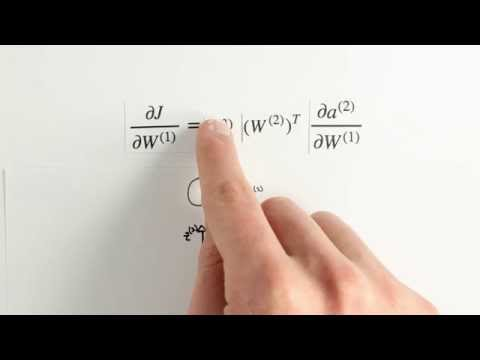

In [2]:
YouTubeVideo('GlcnxUlrtek',width=640,height=360)

**Question 2**: The gradient decent algorithm in Neural Networks is often called  "back propagation."  What is being passed back though the algorithm and causing the weights to be updated? 

<font size=8 color="#009600">&#9998;</font> Back propagation is a widely used algorithm for training feedforward neural networks for supervised learning.

Here is a link to the entire code so far:

https://raw.githubusercontent.com/stephencwelch/Neural-Networks-Demystified/master/partSix.py

&#9989; Do This -  Download and inspect the partSix.py file and run the following command:

In [12]:
# %load partSix.py
# Neural Networks Demystified
# Part 6: Training
#
# Supporting code for short YouTube series on artificial neural networks.
#
# Stephen Welch
# @stephencwelch


## ----------------------- Part 1 ---------------------------- ##
import numpy as np

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

## ----------------------- Part 5 ---------------------------- ##

class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2

    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)

            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0

        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N

    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        return cost, grad

    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res


&#9989; Do This -  Create an instance of the Neural Network and apply forward function to estimate $\hat{y}$:

In [13]:
# put your code here

NN = Neural_Network()
y1 = NN.forward(X)
print("Untrained Output", y1)


Untrained Output [[0.46614583]
 [0.43848735]
 [0.48079901]]


**Question 3**: How good is this initial estimation?

<font size=8 color="#009600">&#9998;</font> pretty close

---

## 3. Training:

Please watch the following video:

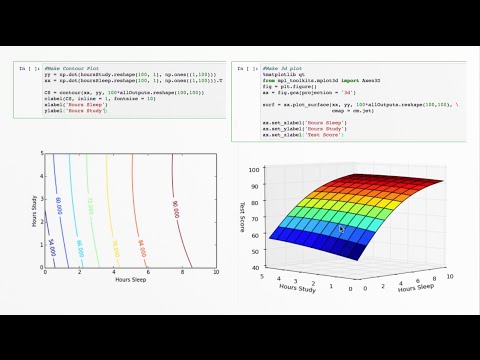

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('9KM9Td6RVgQ',width=640,height=360)

&#9989; Do This -  Now, create an instance of the ```trainer``` class from the partSix.py file. Call the objects ```train``` function by passing it the original ```X``` and ```y``` data:

In [15]:
#Put your code here
T = trainer(NN)
T.train(X,y)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 52
         Function evaluations: 57
         Gradient evaluations: 57


&#9989; Do This -  If done correctly, the ```NN``` object should now be trained. Apply the forward function again to see the new estimation of $\hat{y}$.

**Question 4**: Hopefully this worked and the estimation is better than the previous one.  How close are these values to the original grades?  What shortcomings are there to testing using this approach?

<font size=8 color="#009600">&#9998;</font> It close the original grades 5 evalutions

----
# Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [7]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2018,  Michigan State University Board of Trustees.